<a href="https://colab.research.google.com/github/nicosaboonchi/data-analysis-projects/blob/main/Market_Place_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Sales Analysis

- Order ID: Unique identifier for each sales order.
- Date:Date of the sales transaction.
- Category:Broad category of the product sold (e.g., Electronics, Home Appliances, Clothing, Books, Beauty Products, Sports).
- Product Name:Specific name or model of the product sold.
- Quantity:Number of units of the product sold in the transaction.
- Unit Price:Price of one unit of the product.
- Total Price: Total revenue generated from the sales transaction (Quantity * Unit Price).
- Region:Geographic region where the transaction occurred (e.g., North America, Europe, Asia).
- Payment Method: Method used for payment (e.g., Credit Card, PayPal, Debit Card).

## Insights

1. Analyze sales trends over time to identify seasonal patterns or growth opportunities.
2. Explore the popularity of different product categories across regions.
3. Investigate the impact of payment methods on sales volume or revenue.
4. Identify top-selling products within each category to optimize inventory and marketing strategies.
5. Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.


## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
sns.set_style({"axes.spines.right": False, "axes.spines.top": False})

## Data Import and Exploration

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Online Sales Data.csv")

In [4]:
df.head(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card
7,10008,2024-01-08,Home Appliances,Blueair Classic 480i,2,599.99,1199.98,Europe,PayPal
8,10009,2024-01-09,Clothing,Nike Air Force 1,6,89.99,539.94,Asia,Debit Card
9,10010,2024-01-10,Books,Dune by Frank Herbert,2,25.99,51.98,North America,Credit Card


In [5]:
df.shape

(240, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [7]:
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Data Cleaning

In [9]:
df.columns = map(str.lower, df.columns)

df.rename(columns={"transaction id": "trans_id",
                   "product category": "prod_cat",
                   "product name": "prod_name",
                   "units sold": "units_sold",
                   "unit price": "unit_price",
                   "total revenue": "total_revenue",
                   "payment method": "payment_method"},
          inplace=True)

df["date"] = pd.to_datetime(df["date"])


df.head()

,trans_id,date,prod_cat,prod_name,units_sold,unit_price,total_revenue,region,payment_method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


## More Data Exploration

In [10]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]

print("number of unqiue values in columns:")
for col in cat_cols:
  print(col, ":", len(df[col].unique()))

number of unqiue values in columns:
prod_cat : 6
prod_name : 232
region : 3
payment_method : 3


In [11]:
df.describe()

,trans_id,date,units_sold,unit_price,total_revenue
count,240.00000,240,240.000000,240.000000,240.000000
mean,10120.50000,2024-04-29 12:00:00,2.158333,236.395583,335.699375
min,10001.00000,2024-01-01 00:00:00,1.000000,6.500000,6.500000
25%,10060.75000,2024-02-29 18:00:00,1.000000,29.500000,62.965000
50%,10120.50000,2024-04-29 12:00:00,2.000000,89.990000,179.970000
75%,10180.25000,2024-06-28 06:00:00,3.000000,249.990000,399.225000
max,10240.00000,2024-08-27 00:00:00,10.000000,3899.990000,3899.990000
std,69.42622,NaN,1.322454,429.446695,485.804469


In [12]:
df["prod_cat"].value_counts()

prod_cat
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64

Lets see some of the products that were sold

In [32]:
df["prod_name"].head(10)

0                  iPhone 14 Pro
1               Dyson V11 Vacuum
2               Levi's 501 Jeans
3              The Da Vinci Code
4        Neutrogena Skincare Set
5    Wilson Evolution Basketball
6            MacBook Pro 16-inch
7           Blueair Classic 480i
8               Nike Air Force 1
9          Dune by Frank Herbert
Name: prod_name, dtype: object

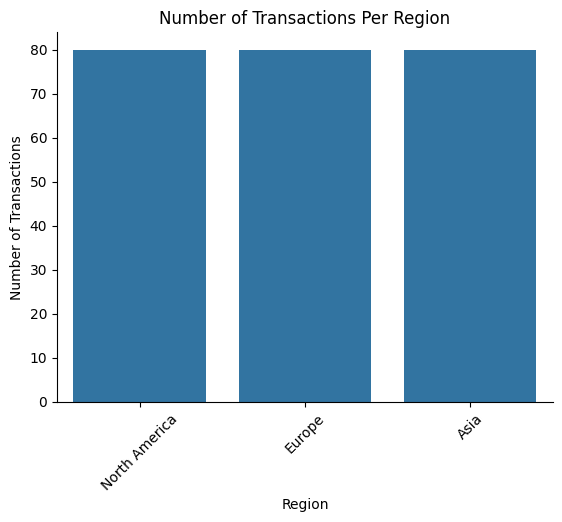

In [83]:
sns.countplot(x="region", data=df)
plt.title("Number of Transactions Per Region")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Number of Transactions")
plt.show()

### Total Revenue

In [40]:
total_revenue = df["total_revenue"].sum()
print(f"Total Revenue: {total_revenue:.2f}")

Total Revenue: 80567.85


### Revenue by Category

In [142]:
revenue_categories = pd.DataFrame(df.groupby("prod_cat")["total_revenue"].sum()).sort_values(by="total_revenue", ascending=False)
revenue_categories

,total_revenue
prod_cat,
Electronics,34982.41
Home Appliances,18646.16
Sports,14326.52
Clothing,8128.93
Beauty Products,2621.90
Books,1861.93


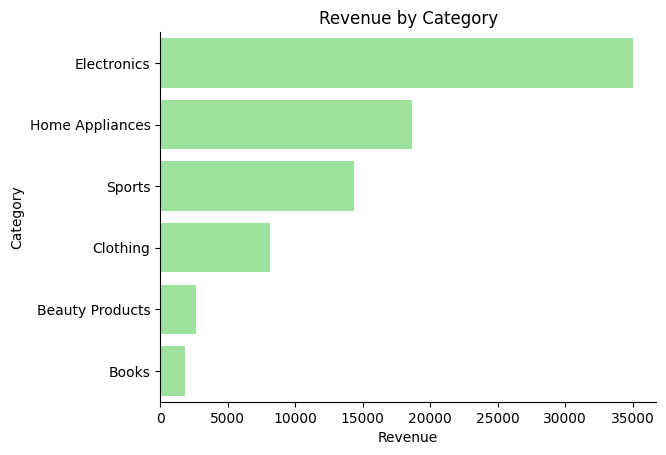

In [143]:
sns.barplot(y="prod_cat", x='total_revenue', data=revenue_categories,
            orient="h", color="lightgreen")
plt.ylabel("Category")
plt.title("Revenue by Category")
plt.xlabel("Revenue")
sns.despine()
plt.show()

### Revenue By Region


In [85]:
revenue_by_region = pd.DataFrame(df.groupby("region")["total_revenue"].sum())
revenue_by_region

,total_revenue
region,
Asia,22455.45
Europe,21268.06
North America,36844.34


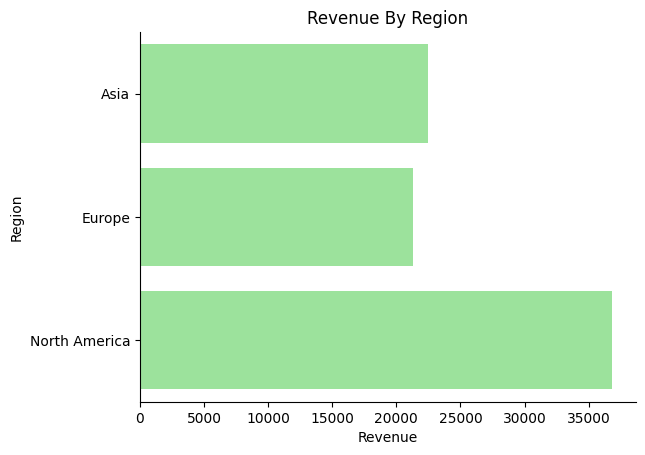

In [87]:
sns.barplot(y="region", x="total_revenue", data=revenue_by_region,
            orient="h", color="lightgreen")
plt.xlabel("Revenue")
plt.ylabel("Region")
plt.title("Revenue By Region")
plt.show()

### Payment Methods

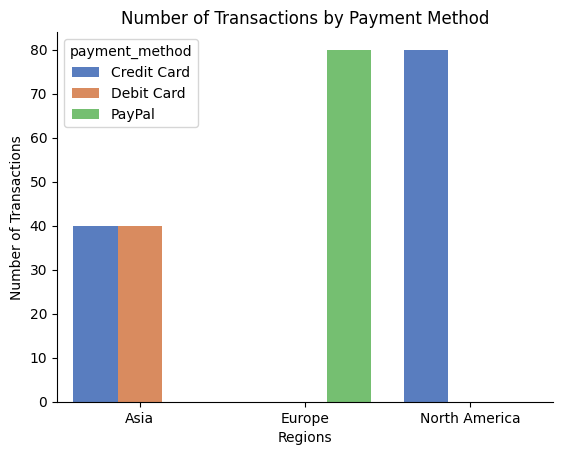

In [111]:
payment_methods = df.groupby("region")["payment_method"].value_counts().to_frame()
sns.barplot(x="region", y='count', data=payment_methods,
            hue="payment_method", palette="muted")
plt.xlabel("Regions")
plt.ylabel("Number of Transactions")

plt.title("Number of Transactions by Payment Method")
plt.show()

### Best Selling Products

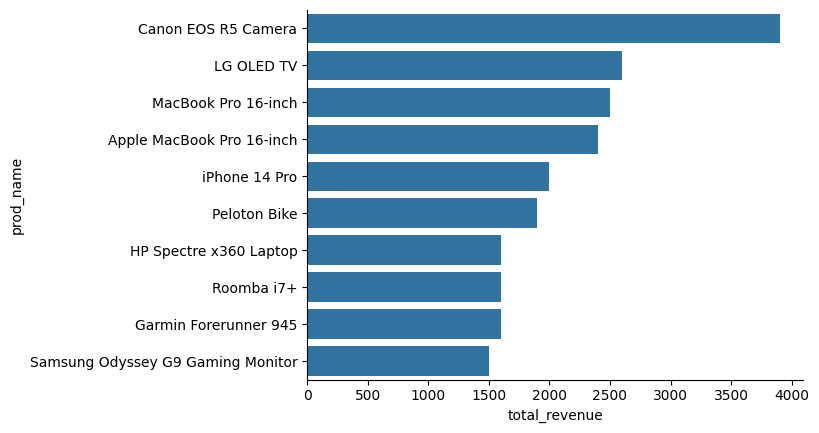

In [121]:
top_10_products = df.groupby("prod_name")["total_revenue"].sum().sort_values(ascending=False).head(10).to_frame()
sns.barplot(x="total_revenue", y="prod_name", data=top_10_products, orient="h")
plt.show()

### Average Revenue Per Transaction

In [126]:
avg_transaction_revenue = df["total_revenue"].mean()
print(f"Average revenue per transaction: ${avg_transaction_revenue:.2f}")

Average revenue per transaction: $335.70


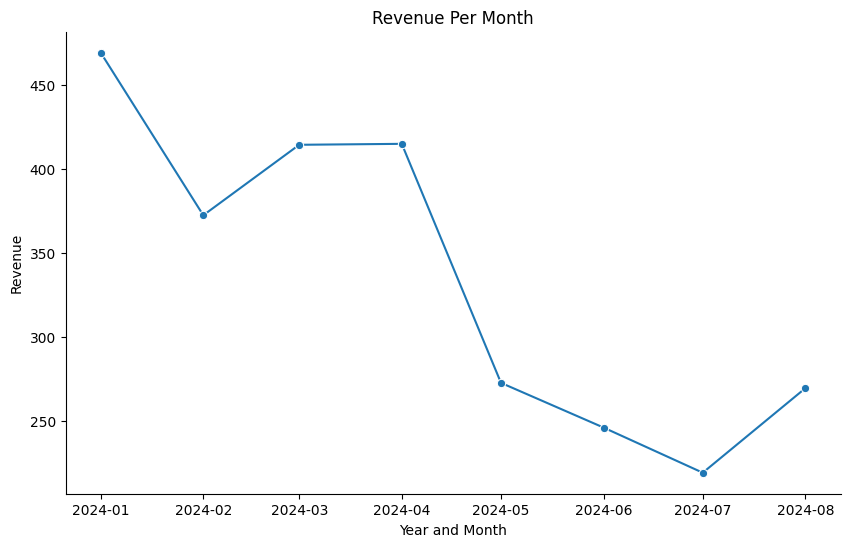

In [141]:
plt.figure(figsize=(10,6))
df['yearMonth'] = df['date'].dt.to_period('M').dt.to_timestamp()
revenue_per_month = df.groupby("yearMonth")["total_revenue"].sum().reset_index()
sns.lineplot(x="yearMonth", y="total_revenue", data=df,
             marker="o", errorbar=None)
plt.xlabel("Year and Month")
plt.ylabel("Revenue")
plt.title("Revenue Per Month")
plt.show()

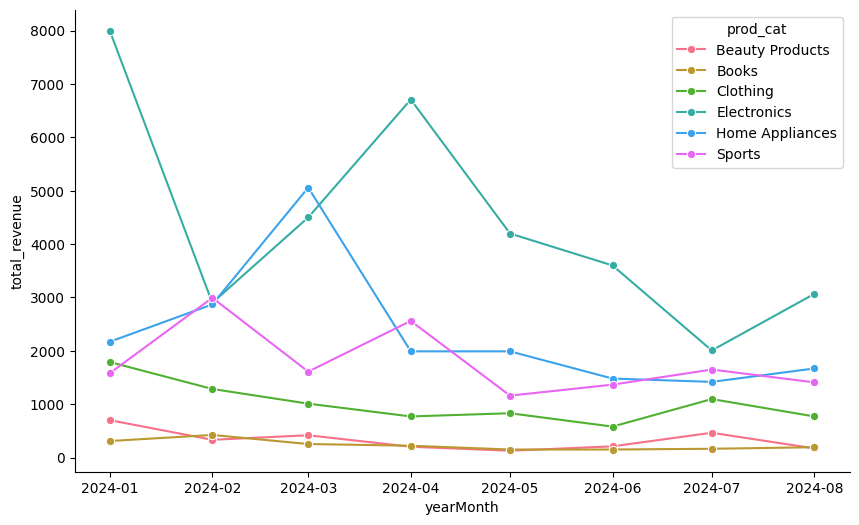

In [156]:
plt.figure(figsize=(10,6))
sales_cat_revenue = df.groupby(["yearMonth", "prod_cat"])["total_revenue"].sum().to_frame()
sns.lineplot(x="yearMonth", y="total_revenue", hue="prod_cat",
             marker="o", data=sales_cat_revenue, palette=sns.husl_palette())
plt.show()